# Exercice 3: Création d'une BD pour gérer des échantillons de roche au laboratoire
O. Kaufmann 2018, 2022

In [1]:
# @info: Exécutez-moi pour activer les questions interactives
# -----------------------------------------------------------

from IPython.display import HTML
import codecs

# @hidden
HTML('''
<script>
code_show=true;
function code_toggle() {
 if (code_show){
  $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 } else {
  $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<div># @info: Exécutez-moi pour activer les questions interactives </div>
''')

# @info: Exécutez-moi pour cacher le code, puis sauvegardez le notebook


***
## 1. Imports et préparation

In [2]:
%load_ext sql

In [3]:
import pandas as pd
from eralchemy import render_er
from IPython.display import SVG, HTML

Effacer le fichier de la base de données si il existe...

In [4]:
! rm echantillons_db.db

In [5]:
! ls

Descriptions_et_interpretations.csv  Exercice_3_Solution.ipynb
Echantillons.csv		     Exercice_4_Solution.ipynb
echantillons_db_schema_final.svg     Lieux_de_prelevements.csv
echantillons_db_schema.svg	     Manipulations.csv
echantillons_db_schema_v1.svg	     Personnes.csv
Exercice_3_Correction.ipynb	     Procedures.csv
Exercice_3.ipynb		     track.txt


***
## 2. Création de la base de données

<div class="alert alert-block alert-success">
	<b>2.1 création de la base de données SQLite</b>
</div>

In [7]:
!ls

Descriptions_et_interpretations.csv  Exercice_3_Solution.ipynb
Echantillons.csv		     Exercice_4_Solution.ipynb
echantillons_db.db		     Lieux_de_prelevements.csv
echantillons_db_schema_final.svg     Manipulations.csv
echantillons_db_schema.svg	     Personnes.csv
echantillons_db_schema_v1.svg	     Procedures.csv
Exercice_3_Correction.ipynb	     track.txt
Exercice_3.ipynb


<div class="alert alert-block alert-success">
	<b>2.2 Définition de la structure des tables et des relations entre tables</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le schéma de la base de données que l'on souhaite créer est repoduit ci-dessous.
</div>

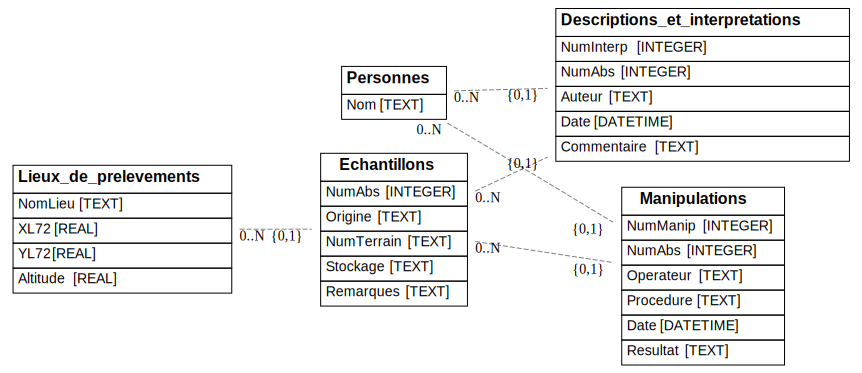

In [8]:
SVG(filename='echantillons_db_schema_v1.svg')

Création de la table "Personnes"

In [9]:
%%sql 
CREATE TABLE `Personnes`
 (
 `Nom`   TEXT NOT NULL,
 PRIMARY KEY (`Nom`)
);

 * sqlite:///echantillons_db.db
Done.


[]

Création de la table "Lieux_de_prelevement"

In [10]:
%%sql 
CREATE TABLE `Lieux_de_prelevements`
 (
 `NomLieu`   TEXT NOT NULL, 
 `XL72`   REAL DEFAULT 0, 
 `YL72`   REAL DEFAULT 0, 
 `Altitude`   REAL DEFAULT 0,
 PRIMARY KEY (`NomLieu`)   
);

 * sqlite:///echantillons_db.db
Done.


[]

Création de la table "Echantillons"

In [11]:
%%sql 
CREATE TABLE `Echantillons`
 (
 `NumAbs`   INTEGER NOT NULL, 
 `Origine`   TEXT, 
 `NumTerrain`   TEXT, 
 `Stockage`   TEXT, 
 `Remarques`   TEXT,
 PRIMARY KEY (`NumAbs`),
 FOREIGN KEY (`Origine`) REFERENCES `Lieux_de_prelevements`(`NomLieu`) ON UPDATE CASCADE
);

 * sqlite:///echantillons_db.db
Done.


[]

Création de la table "Descriptions_et_interpretations"

In [12]:
%%sql 
CREATE TABLE `Descriptions_et_interpretations`
 (
 `NumInterp`   INTEGER NOT NULL, 
 `NumAbs`   INTEGER, 
 `Auteur`   TEXT, 
 `Date`   DateTime, 
 `Commentaire`   TEXT,
 PRIMARY KEY (`NumInterp`),
 FOREIGN KEY (`NumAbs`) REFERENCES `Echantillons`(`NumAbs`) ON UPDATE CASCADE,
 FOREIGN KEY (`Auteur`) REFERENCES `Personnes`(`Nom`) ON UPDATE CASCADE
);

 * sqlite:///echantillons_db.db
Done.


[]

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez la table "Manipulations"
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Activez de l'intégrité référentielle
</div>

In [14]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303030223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030302220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2573716c20505241474d4120666f726569676e5f6b657973203d204f4e3b0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Affichez le schéma de la base de donnée et comparez-le au schéma proposé plus haut.
</div>

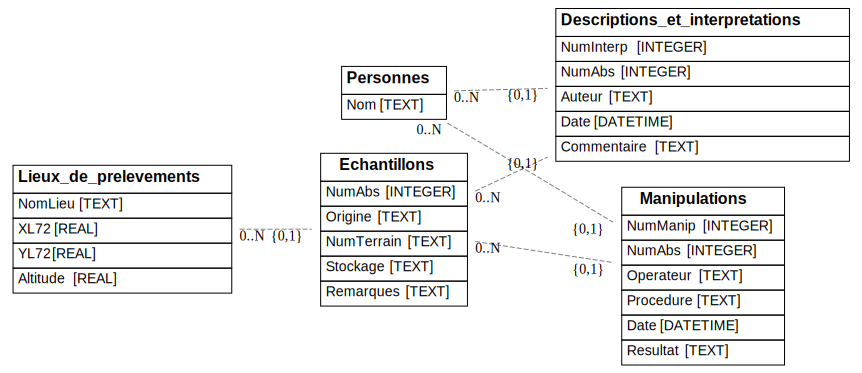

In [15]:
# @question
render_er('sqlite:///echantillons_db.db', 'echantillons_db_schema.svg')
SVG('echantillons_db_schema.svg')

<div class="alert alert-block alert-success">
	<b>2.3 Complément à la base de données</b>
</div>

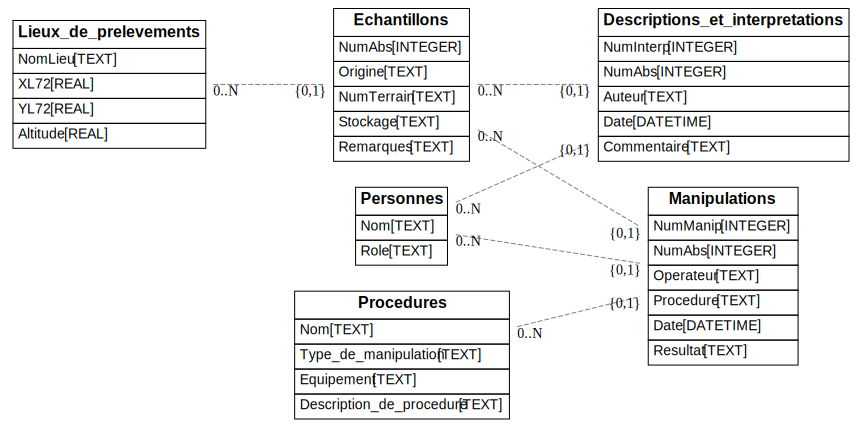

In [16]:
SVG(filename='echantillons_db_schema_final.svg')

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Ajoutez la définition de la table "Procedures" reprenant les procédures qui peuvent être utilisées lors des manipulations en vous basant sur le schéma complété ci-dessus.
</div>

In [17]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303031223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030312220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2573716c20435245415445205441424c45206050726f636564757265736028604e6f6d6020202054455854204e4f54204e554c4c2c2060547970655f64655f6d616e6970756c6174696f6e60202020544558542c20604571756970656d656e7460202020544558542c20604465736372697074696f6e5f64655f70726f63656475726560202020544558542c5052494d415259204b45592028604e6f6d6029293b0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [ ]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a3c623e5175657374696f6e3a203c2f623e3c62723e416666696368657a206c6520736368c3a96d61206465206c61206261736520646520646f6e6ec3a96520657420636f6d706172657a2d6c6520617520736368c3a96d612070726f706f73c3a920706c757320686175742e2051756520636f6e73746174657a2d766f75733f0a0a0a3c2f6469763e203c62723e0a3c627574746f6e20646174612d746f67676c653d22636f6c6c61707365220a2020202020202020202020202020202020202020646174612d7461726765743d22237175657374696f6e5f30303034223e4166666963686572206c612072c3a9706f6e73653c2f627574746f6e3e0a0a3c6469762069643d227175657374696f6e5f30303034220a2020202020202020202020202020202020202020636c6173733d22636f6c6c61707365223e202020204c612072656c6174696f6e20656e747265206c61207461626c6520224d616e6970756c6174696f6e7322206574206c61207461626c65202250726f63c3a9647572657322206e6520666967757265207061732064616e73206c6520736368c3a96d612e0a3c2f6469763e0a'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour afficher la question interactive


In [ ]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a3c623e5175657374696f6e3a203c2f623e3c62723e436f6d6d656e7420616a6f75746572206c612072656c6174696f6e20656e747265206c61207461626c6520224d616e6970756c6174696f6e7322206574206c61207461626c65202250726f63656475726573223f0a0a0a3c2f6469763e203c62723e0a3c627574746f6e20646174612d746f67676c653d22636f6c6c61707365220a2020202020202020202020202020202020202020646174612d7461726765743d22237175657374696f6e5f30303035223e4166666963686572206c612072c3a9706f6e73653c2f627574746f6e3e0a0a3c6469762069643d227175657374696f6e5f30303035220a2020202020202020202020202020202020202020636c6173733d22636f6c6c61707365223e20202020416a6f757465722064616e73206c612064c3a966696e6974696f6e206465206c61207461626c6520224d616e6970756c6174696f6e732220756e6520636cc3a920c3a97472616e67c3a8726520706f7572206c65206368616d70202250726f6365647572652220726566c3a972656ec3a7616e74206c65206368616d7020224e6f6d22206465206c61207461626c65202250726f63656475726573222e0a3c2f6469763e0a'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour afficher la question interactive


<b>Note:</b><br>    SQLite ne permet pas de modifier la structure de la table avec la commande SQL standard <br>  <br>
    <code>ALTER TABLE child ADD CONSTRAINT fk_child_parent FOREIGN KEY (parent_id) REFERENCES parent(id);</code><br>
    Il faut donc effacer la table "Manipulations" et la recréer avec la structure complète.


In [19]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303032223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030322220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2573716c2044524f50205441424c45204d616e6970756c6174696f6e733b0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [20]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303033223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030332220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2573716c20435245415445205441424c4520604d616e6970756c6174696f6e73602028604e756d4d616e69706020494e5445474552204e4f54204e554c4c2c20604e756d4162736020494e54454745522044454641554c5420302c20604f70657261746575726020544558542c206050726f6365647572656020544558542c20604461746560204461746554696d652c2060526573756c7461746020544558542c205052494d415259204b45592028604e756d4d616e697060292c20464f524549474e204b45592028604e756d4162736029205245464552454e4345532060456368616e74696c6c6f6e736028604e756d4162736029204f4e2055504441544520434153434144452c20464f524549474e204b45592028604f70657261746575726029205245464552454e4345532060506572736f6e6e65736028604e6f6d6029204f4e2055504441544520434153434144452c20464f524549474e204b455920286050726f6365647572656029205245464552454e434553206050726f636564757265736028604e6f6d6029204f4e205550444154452043415343414445293b0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Affichez le schéma de la base de donnée complété et comparez-le au schéma proposé plus haut.
</div>

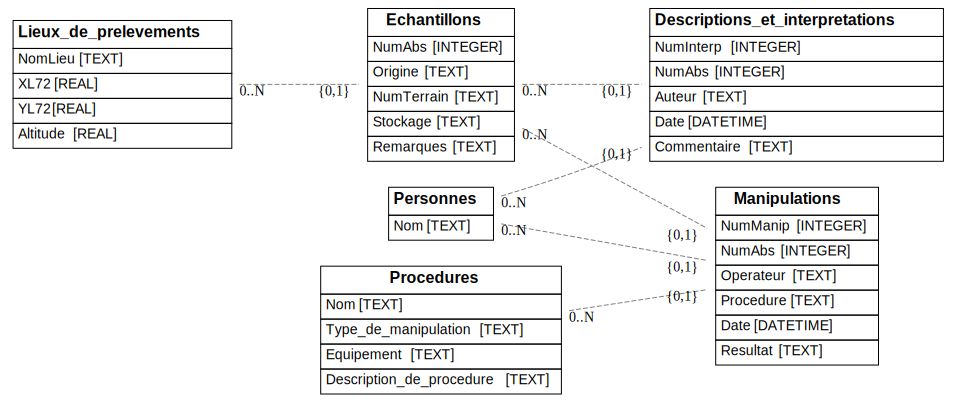

In [21]:
# @question
render_er('sqlite:///echantillons_db.db', 'echantillons_db_schema.svg')
SVG('echantillons_db_schema.svg')

***
## 3. Insertion de données dans la base de données

<b>Note:</b><br>    Nous allons utiliser le "package" python pandas pour peupler les différentes tables à partir des fichiers *.csv fournis<br>
    Le format csv signifie "comma separated values" ou valeurs séparées par des virgules. Vous pouvez visualiser le contenu des fichiers avec un éditeur de texte tel que gedit.


Insertion des données dans la table "Personnes"

In [22]:
df = pd.read_csv('Personnes.csv', sep=',')
df

,Nom
0,Annick VANDENBERGHE
1,Brigitte PIERRARD
2,Olivier KAUFMANN
3,Yves QUINIF


In [23]:
for idx, row in df.iterrows():
    Nom=str(row['Nom'])
    %sql INSERT INTO Personnes('Nom') VALUES(:Nom)

 * sqlite:///echantillons_db.db
1 rows affected.
 * sqlite:///echantillons_db.db
1 rows affected.
 * sqlite:///echantillons_db.db
1 rows affected.
 * sqlite:///echantillons_db.db
1 rows affected.


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Ajouter les données relatives aux échantillons aux lieux de prélèvement aux descriptions et interprétations aux manipulations et aux procédures.
</div>

<b>Note:</b><br>    Attention à l'ordre d'insertion de l'information compte tenu des relations entre tables.  


In [24]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303034223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030342220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6466203d2070642e726561645f63737628274c696575785f64655f7072656c6576656d656e74732e637376272c207365703d272c27293c62723e0a64660a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [25]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303035223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030352220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e666f72206964782c20726f7720696e2064662e69746572726f777328293a3c62723e0a202020204e6f6d4c6965753d73747228726f775b274e6f6d4c696575275d293c62723e0a20202020584c37323d73747228726f775b27584c3732275d293c62723e0a20202020594c37323d73747228726f775b27594c3732275d293c62723e0a20202020416c7469747564653d73747228726f775b27416c746974756465275d293c62723e0a202020202573716c20494e5345525420494e544f204c696575785f64655f7072656c6576656d656e747328274e6f6d4c696575272c27584c3732272c2027594c3732272c2027416c74697475646527292056414c554553283a4e6f6d4c6965752c203a584c37322c203a594c37322c203a416c746974756465290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


Echantillons

Descriptions_et_interpretations

Procédures

Manipulations

***
## 4. Pour aller un peu plus loin...

<div class="alert alert-block alert-success">
	<b>4.1 Récupérer le résultat d'une requête sql sur la BD dans un dataframe pandas</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Une requête sql créée avec l'extension ipython-sql retourne, par défaut, un objet de type 'sql.run.ResultSet'.
</div>

In [34]:
%%sql
SELECT * FROM Manipulations;

 * sqlite:///echantillons_db.db
Done.


NumManip,NumAbs,Operateur,Procedure,Date,Resultat
2,5814,Olivier KAUFMANN,PRELEV-00,2016/04/12 10:30:00.000,nan
3,5823,Yves QUINIF,PRELEV-00,2019/01/07 15:35:00.000,nan
4,5824,Olivier KAUFMANN,FORAGE-00,2019/01/21 13:50:00.000,nan
5,5814,Brigitte PIERRARD,GRANULO-00,2016/05/17 09:07:00.000,nan
6,5821,Yves QUINIF,PRELEV-00,2017/12/09 14:00:00.000,nan


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Vérifiez le type du résultat de la requête précédente 
</div>

<b>Note:</b><br>    La variable spéciale '_' contient la sortie de la dernière cellule exécutée.


In [35]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303036223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030362220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e74797065285f290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-info">
<b>Info:</b><br>     Il est possible de configuer ipython-sql pour obtenir directement un dataframe pandas en sortie d'une requête.
</div>

In [36]:
%config SqlMagic.autopandas=True

In [37]:
%%sql
SELECT * FROM Manipulations;

 * sqlite:///echantillons_db.db
Done.


,NumManip,NumAbs,Operateur,Procedure,Date,Resultat
0,2,5814,Olivier KAUFMANN,PRELEV-00,2016/04/12 10:30:00.000,nan
1,3,5823,Yves QUINIF,PRELEV-00,2019/01/07 15:35:00.000,nan
2,4,5824,Olivier KAUFMANN,FORAGE-00,2019/01/21 13:50:00.000,nan
3,5,5814,Brigitte PIERRARD,GRANULO-00,2016/05/17 09:07:00.000,nan
4,6,5821,Yves QUINIF,PRELEV-00,2017/12/09 14:00:00.000,nan


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Récupérez le résultat de la requête, vérifiez son type et affichez le dataframe.
</div>

In [38]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303037223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030372220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6466203d205f3c62723e0a74797065286466290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [39]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303038223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030382220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e64660a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive
